# CAPÍTULO 8.

## DATOS DE LAS TABLAS:

In [3]:

# Tabla de Elementos:
tbl_Elem = [
    ['E1', 1, 1, 'N5', 'N1'],
    ['E2', 1, 1, 'N2', 'N1'],
    ['E3', 1, 1, 'N3', 'N2'],
    ['E4', 1, 1, 'N2', 'N5'],
    ['E5', 1, 1, 'N3', 'N5'],
    ['E6', 1, 1, 'N4', 'N5'],
    ['E7', 1, 1, 'N4', 'N3']]
    
# Tabla de Nodos:
tbl_Nods = [
    ['N1', 14, 7, "Libre"],
    ['N2', 7, 7, "Libre"],
    ['N3', 0, 7, "Fijo"],
    ['N4', 0, 0, "Fijo"],
    ['N5', 7, 0, "Libre"]]

# Tabla de Fuerzas:
tbl_Frza = [
    [ -3, 'N2', 'DY'],
    [ -2, 'N1', 'DX']
]

# Tabla de Desplazamientos:
tbl_Desp = [
    [ 0, 'N3', 'DX'],
    [ 0, 'N3', 'DY'],
    [ 0, 'N4', 'DX'],
    [ 0, 'N4', 'DY']]

# Diccionario Nodal:
N = {'N1': [14, 7, 1, 2], 'N2': [7, 7, 3, 4], 'N3': [0, 7, 9, 10], 'N4': [0, 0, 7, 8], 'N5': [7, 0, 5, 6]}

# CÓDIGO PARA EL DIBUJO.

(-3.5, 10.5)

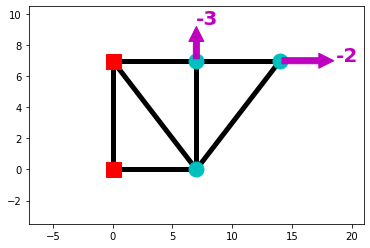

In [23]:
#############
# Librerias #
#############

import matplotlib.pyplot as plt

####################################
# Dibujo de las barras (Elementos) #
####################################

for i in range(len(tbl_Elem)):
    NI = tbl_Elem[i][3]
    NF = tbl_Elem[i][4]
    xi = N[NI][0]
    yi = N[NI][1]
    xf = N[NF][0]
    yf = N[NF][1]
    plt.plot([xi, xf],[yi, yf], 'k-', linewidth = 5)
    
##############################################
# Dibujo de los apoyos (Libre, Fijo, DX, DY) #
##############################################

for i in range(len(tbl_Nods)):
    cx = tbl_Nods[i][1]
    cy = tbl_Nods[i][2]
    fig = tbl_Nods[i][3]
    if fig == "Libre":
        plt.plot(cx, cy, 'oc', ms = 15)
    elif fig == "Fijo":
        plt.plot(cx, cy, 'sr', ms = 15)
    elif fig == "DX":
        plt.plot(cx, cy, '^r', ms = 15)
    elif fig == "DY":
        plt.plot(cx, cy, '<r', ms = 15)

############################
# Límite de los ejes X y Y #
############################

xmax = 0
ymax = 0
for key in N:
    xval = N[key][0]
    yval = N[key][1]
    if xmax < xval:
        xmax = xval
    if ymax < yval:
        ymax = yval
        
        
#########################
# Dibujo de las fuerzas #
#########################
        
def Fuerzas(Direccion, cx, cy, val):
    if Direccion == "DX":
        plt.annotate("", xy = (cx+xmax/3, cy), xytext = (cx, cy), arrowprops = dict(arrowstyle = "simple", color = "m"), size = 30)
        plt.text(cx+xmax/3, cy, str(val), weight = "bold", color = "m", size = 20)
    elif Direccion == "DY":
        plt.annotate("", xy = (cx, cy+ymax/3), xytext = (cx, cy), arrowprops = dict(arrowstyle = "simple", color = "m"), size = 30)
        plt.text(cx, cy+ymax/3, str(val), weight = "bold", color = "m", size = 20)
        
        
for i in range(len(tbl_Frza)):
    Nod = tbl_Frza[i][1]
    cx = N[Nod][0]
    cy = N[Nod][1]
    Direc = tbl_Frza[i][2]
    valor = tbl_Frza[i][0]
    Fuerzas(Direc, cx, cy, valor)
    
    

plt.xlim([-0.5*xmax,1.5*xmax])
plt.ylim([-0.5*ymax,1.5*ymax])